<a href="https://colab.research.google.com/github/adilurahman/pandas-case-study/blob/main/Unsupravised_case_studdy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression#logistic regression
from sklearn.neighbors import KNeighborsClassifier#knn
from sklearn.naive_bayes import GaussianNB #naive bayes
from sklearn.tree import DecisionTreeClassifier #decision Tree
from sklearn.svm import SVC #svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


In [3]:
adult=pd.read_csv('/content/adult_dataset.csv')
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


#dataset overview

In [4]:
adult.duplicated().sum()


np.int64(16)

In [5]:
adult.drop_duplicates() #delete duplicates


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


In [6]:
data=adult.drop('income',axis=1)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba


#data processing


In [7]:
data.nunique()

,0
age,82
workclass,9
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [8]:
#to find ? mark in which raw and column
data[data.isin(['?']).any(axis=1)].index

Index([   14,    27,    38,    51,    61,    69,    77,    93,   106,   128,
       ...
       32490, 32492, 32494, 32510, 32525, 32530, 32531, 32539, 32541, 32542],
      dtype='int64', length=2374)

In [9]:
data.replace('?',np.nan,inplace=True)
#here convert ? in to nan values and next step we delete null values

In [10]:
data.isnull().sum()


,0
age,2442
workclass,5125
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,5115
relationship,0
race,0
sex,0


In [11]:
#replace numerical data with mean

data['age']=data['age'].fillna(data['age'].median())#age
data['hours-per-week']=data['hours-per-week'].fillna(data['hours-per-week'].median())#hours-per-week




In [12]:
#replace categorical data with mode
categorical_data=['workclass','occupation','native-country']
for i in categorical_data:
  data[i] = data[i].fillna( data[i].mode()[0])
  # data[i].fillna( data[i].mode()[0],inplace=True)  this is he another method


<Axes: >

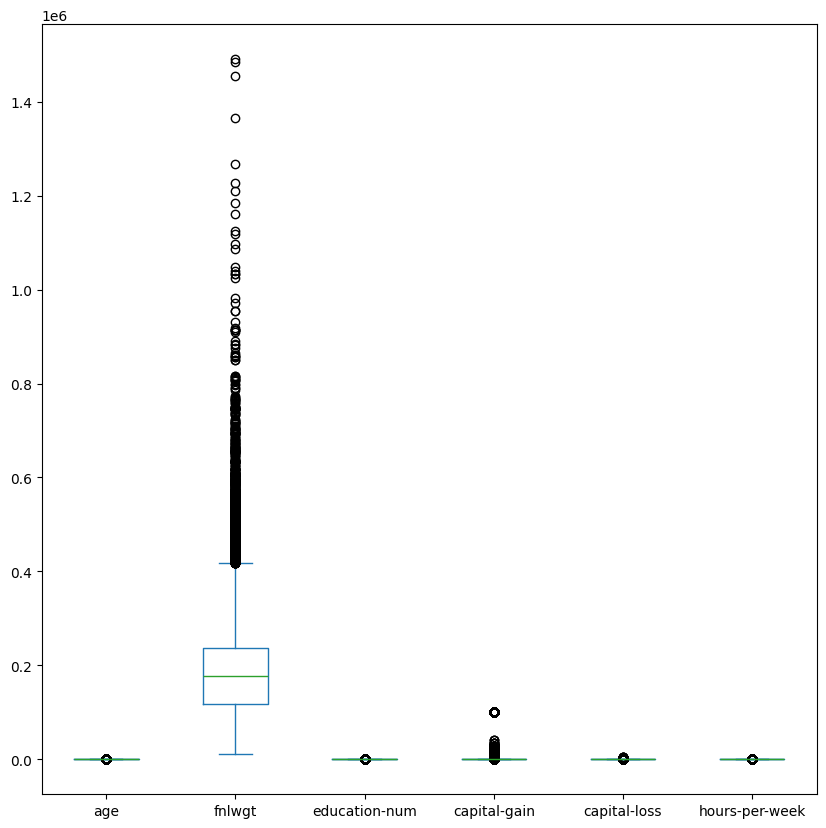

In [13]:
# outlayer
#sns.boxplot(data=data[['age','fnlwgt','education-num']])
#plt.show()
#sns.boxplot(data=data[['education-num','hours-per-week']])
#plt.show()


#or we can use another code that is
data.plot(kind='box',figsize=(10,10))
#here we can draw thies two plot in single canvas

#handiling outlayers

In [14]:
fa= ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in fa:
  q1=np.percentile(data[col],25)
  q3=np.percentile(data[col],75)
  iqr=q3-q1

  up_val=q3+(1.5*iqr)
  low_val=q1-(1.5*iqr)
#clipping
  data[col]=data[col].clip(lower=low_val,upper=up_val)


<Axes: >

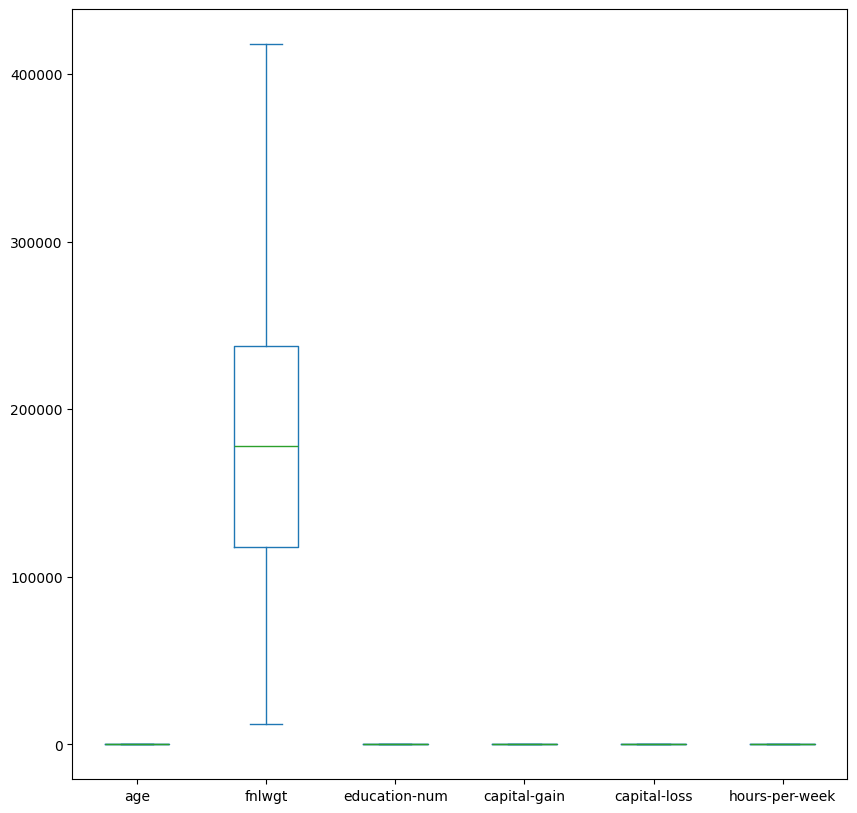

In [15]:
data.plot(kind='box',figsize=(10,10))

#encoding


In [16]:
#one hot encoding
data_encoded= pd.get_dummies(data, drop_first=True)
data_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516.0,13.0,0,0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50.0,83311.0,13.0,0,0,32.5,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38.0,215646.0,9.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53.0,234721.0,7.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28.0,338409.0,13.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419.0,13.0,0,0,36.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48838,64.0,321403.0,9.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,38.0,374983.0,13.0,0,0,50.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,44.0,83891.0,13.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


#scaling

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)
scaled_data

array([[ 0.035311  , -1.14609686,  1.17137369, ...,  0.29703764,
        -0.04125833, -0.02170548],
       [ 0.86418446, -1.08530652,  1.17137369, ...,  0.29703764,
        -0.04125833, -0.02170548],
       [-0.04004114,  0.30290578, -0.45671432, ...,  0.29703764,
        -0.04125833, -0.02170548],
       ...,
       [-0.04004114,  1.97437276,  1.17137369, ...,  0.29703764,
        -0.04125833, -0.02170548],
       [ 0.41207166, -1.07922224,  1.17137369, ...,  0.29703764,
        -0.04125833, -0.02170548],
       [-0.26609754, -0.04849283,  1.17137369, ...,  0.29703764,
        -0.04125833, -0.02170548]])

#Exploratory Data Analysis

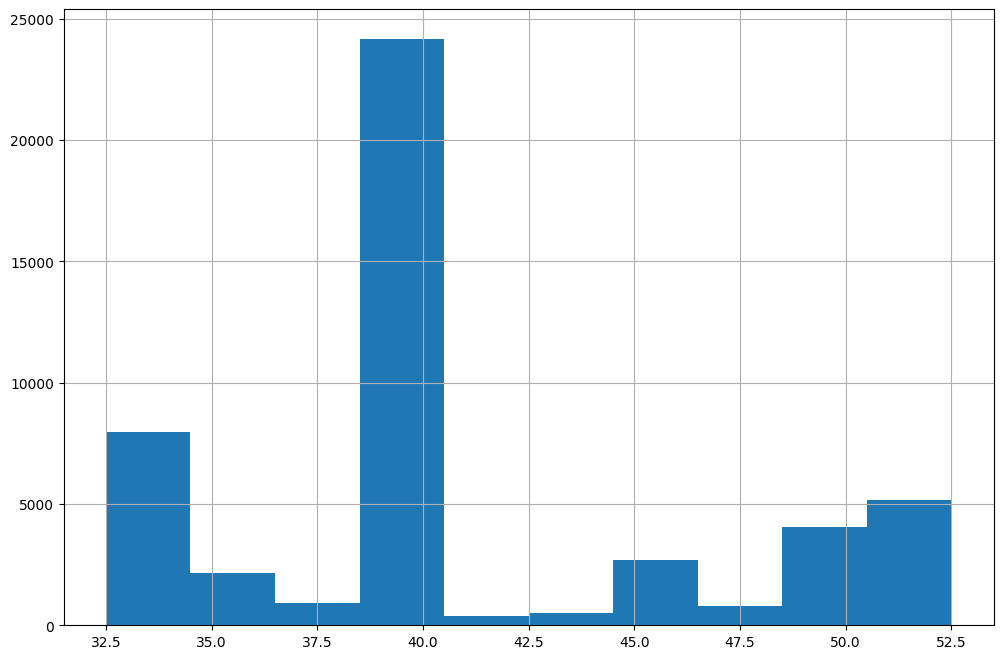

In [18]:
data[col].hist(figsize=(12,8))
plt.show()

In [19]:
#Correlation Analysis


In [20]:
#PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[ 0.84765605,  2.6302101 ],
       [ 3.25365246,  0.50858018],
       [-0.8473126 , -0.4912789 ],
       ...,
       [ 2.10946976,  0.77690147],
       [-0.34550297,  0.76781297],
       [ 3.88607212,  0.79560086]])

#Clustering

In [21]:
wcss=[]
sil=[]



for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)
  labels=kmeans.predict(scaled_data)
  sil_score=silhouette_score(scaled_data,labels,metric='euclidean')
  print('wcss and silhouette score for k ={} is {} and {}'.format(i,kmeans.inertia_,sil_score))
  sil.append(sil_score)

wcss and silhouette score for k =2 is 4512220.627376313 and 0.051197553873958815
wcss and silhouette score for k =3 is 4437225.470932357 and 0.04473200740486426
wcss and silhouette score for k =4 is 4364010.478022905 and 0.0377876523051493
wcss and silhouette score for k =5 is 4326613.803258062 and 0.049432681011805236


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (9,) and (5,)

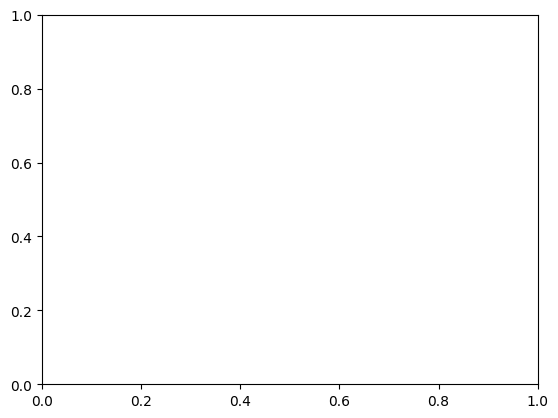

In [22]:
plt.plot(range(2,11),wcss,marker ="*")
plt.title("wcss score")
plt.xlabel("count of vclusters")
plt.ylabel("wcss")
plt.show()

#Silhouette Score

In [ ]:
plt.plot(range(2,11),sil,marker ="*")
plt.title("silhoutte score")
plt.xlabel("count of vclusters")
plt.ylabel("silhoutte")
plt.show()

#Visualizing KMeans Clusters

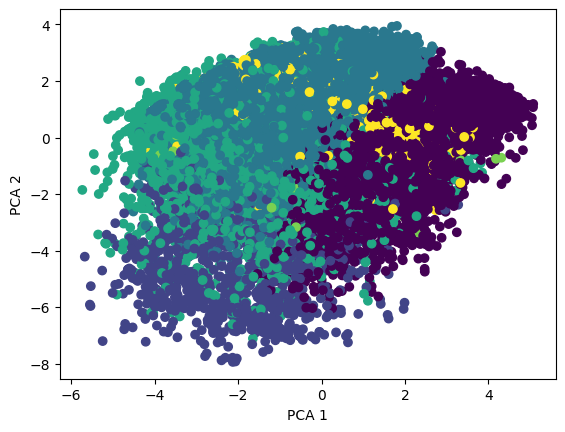

In [23]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [ ]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering


agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(scaled_data)


In [ ]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=agg_labels)
plt.show()

#Interpretation & Profiling

In [ ]:
#Add Cluster Labels
data["Cluster"] = labels


In [ ]:
#Cluster Profiling
cluster_summary = data.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary)

In [ ]:
#Compare with Income (Not Used in Training)
pd.crosstab(data["Cluster"], data["income"])
